

Необходимые данные находятся в таблицах схемы `stackoverflow`. Не забудьте подключиться к базе с помощью SQLAlchemy. Вспомните инструкцию из урока 11 «Когортный анализ. Представление результатов» в теме 2 «Установка и настройка базы данных и клиента базы данных».. Пример кода для подключения к базе и выгрузки результатов вы найдёте и в этой тетрадке.

Некоторые задания включают дополнительные вопросы — не пропустите их. На часть вопросов можно ответить текстом, а для некоторых понадобится визуализация. Помните, что результат запроса можно выгрузить в датафрейм.

Чтобы ожидаемый результат было легче представить, мы добавили к каждому заданию небольшой фрагмент итоговой таблицы. В запросах вы можете использовать любые подходящие названия полей.

In [ ]:
# !pip install pandas
# !pip install matplotlib
# !pip install sqlalchemy
# !pip install seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

### Конфигурация для подключения к базе данных `data-analyst-advanced-sql`
Эта база данных содержит схему `stackoverflow`, с которой вы будете работать в проекте

In [ ]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [ ]:
engine = create_engine(connection_string)

Пример запроса к базе данных

`sample_df` является pandas-датафреймом.

In [ ]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine)

In [ ]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


# Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [ ]:
# напишите запрос
query = """
SELECT DATE_TRUNC('MONTH',creation_date::date)::date AS month_date,
SUM(views_count) AS total_views
FROM stackoverflow.posts
WHERE EXTRACT(YEAR FROM creation_date) = 2008
GROUP BY DATE_TRUNC('MONTH',creation_date::date)::date
ORDER BY total_views DESC
"""

# выполните запрос

In [ ]:
tmp = pd.read_sql_query(sql=query,con=engine)

In [ ]:
tmp

,month_date,total_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?

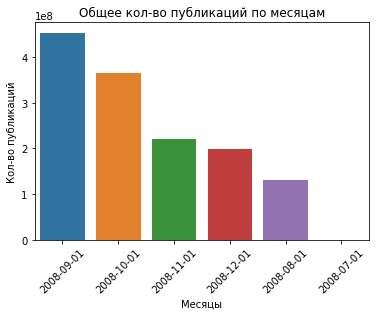

In [ ]:
sns.barplot(data=tmp,x='month_date',y='total_views')
plt.xticks(rotation=45)
plt.title('Общее кол-во публикаций по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во публикаций')
plt.show()

**Вывод:**

* Мы можем видеть из графика, что наибольшее кол-во публикаций приходится на сентябрь 2008 года - **452_928_568**, а минимальный июль 2008 года - **669_895**.  
* 3 месяца с июль по сентябрь наблюдался резкий рост публикаций.
* С октября по декабрь наблюдался спад.


1) Спад мог быть обоснован тем, что обычно энтузиазм к любой вешщи будь то сайт, предмет или инструмент, в первое время очень большой и увеличивается большими темпами, но со временем угасает и нормализуется и переходит в естественность.

2) Также тем, что на этом сайте в первое время любители и новички начали задавать простые вопросы, накопившиеся за все время и ненашедшие ответов. Более опытные ребята давали исчерпывающие ответы на оные вопросы.

# Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [ ]:
# напишите запрос
query = """
SELECT DISTINCT display_name AS display_name,COUNT(DISTINCT user_id)
FROM stackoverflow.users AS u JOIN
stackoverflow.posts AS p ON u.id = p.user_id
WHERE post_type_id = 2 AND p.creation_date - u.creation_date < INTERVAL '1 MONTH'
GROUP BY display_name
HAVING COUNT(*) > 100
ORDER BY 1
"""

# выполните запрос

<details>

<summary>Подсказка</summary>
Вам нужно присоединить несколько таблиц — изучите внимательнее описание базы. Чтобы добавить промежуток времени к дате, используйте ключевое слово INTERVAL, например, так: <дата> + INTERVAL '1 year 2 months 3 days'
.</details>

Какие аномалии наблюдаются в данных? О чём они говорят?

In [ ]:
tmp = pd.read_sql_query(sql=query,con=engine)

In [ ]:
tmp

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
71,leppie,1
72,lomaxx,1
73,mattlant,1
74,paxdiablo,1


In [ ]:
tmp[tmp['count'] > 1].agg({'count':['sum','count']})

,count
sum,254
count,19


In [ ]:
tmp[tmp['count'] == 1]['count'].sum()

57

**Вывод:**

Аномалий как таковых нет, просто бывает, что отображающие имена не являются уникальными как в нашем случае:

* **254 пользователей с 19 неуникальными именами**
* **57 уникальных отображающихся имен**

# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [ ]:
# напишите запрос
query = """
SELECT DATE_TRUNC('MONTH',posts.creation_date::date)::date AS month, COUNT(*)
FROM stackoverflow.posts
WHERE user_id IN (SELECT DISTINCT user_id
FROM stackoverflow.posts AS p JOIN
 stackoverflow.users AS u ON u.id = p.user_id
WHERE (EXTRACT(YEAR FROM p.creation_date)= 2008 AND EXTRACT(MONTH FROM p.creation_date)=12) AND (EXTRACT(YEAR FROM u.creation_date)= 2008 AND EXTRACT(MONTH FROM u.creation_date)=9)
GROUP BY user_id
HAVING COUNT(*)!= 0)
GROUP BY DATE_TRUNC('MONTH',posts.creation_date::date)::date
ORDER BY month DESC
"""

# выполните запрос

In [ ]:
tmp = pd.read_sql_query(sql=query,con=engine)

In [ ]:
tmp

,month,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


Изучите данные: есть ли в них аномалии? Предположите, почему могли появиться аномальные значения.

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

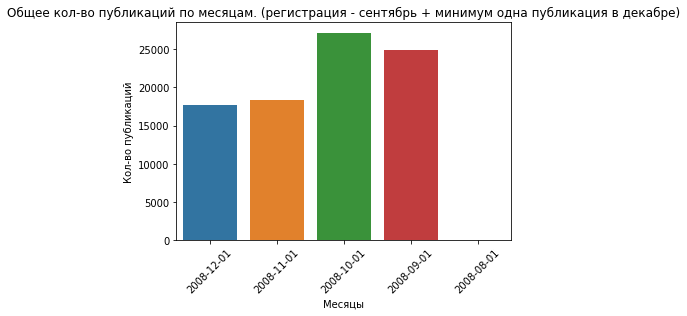

In [ ]:
# напишите ваш ответ здесь
sns.barplot(data=tmp,x='month',y='count')
plt.xticks(rotation=45)
plt.title('Общее кол-во публикаций по месяцам. (регистрация - сентябрь + минимум одна публикация в декабре)')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во публикаций')
plt.show()

**Вывод:**

* В данных присутствуют аномалии ввиде 32 публикаций в августе 2008 года, потому что профили должны быть арегистрированы в сентябре, возможно они сделали их под видом гостя, а потом зарегистрировались.



# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  |
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [ ]:
# напишите запрос
query = '''
SELECT user_id,
creation_date,
views_count,
SUM(views_count) OVER (PARTITION BY user_id ORDER BY creation_date) AS cumulative_count
FROM stackoverflow.posts
ORDER BY 1,2

'''

# выполните запрос

In [ ]:
tmp = pd.read_sql_query(sql=query,con=engine)

In [ ]:
tmp

,user_id,creation_date,views_count,cumulative_count
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте.

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [ ]:
# напишите запрос
query = '''
WITH user_id_more_120 AS
(SELECT user_id
FROM stackoverflow.posts
WHERE EXTRACT(YEAR FROM posts.creation_date::date) = 2008 AND EXTRACT(MONTH FROM posts.creation_date::date) = 8
GROUP BY user_id,DATE_TRUNC('MONTH',creation_date::date)::date
HAVING COUNT(*) > 120)

SELECT DISTINCT user_id, AVG(counter) OVER (PARTITION BY user_id)
FROM
(SELECT DISTINCT user_id, data_trunc, counter
FROM (SELECT id,
         user_id,
         DATE_TRUNC('DAY', posts.creation_date)::date data_trunc,
        COUNT(user_id) OVER (PARTITION BY user_id ORDER BY DATE_TRUNC('DAY', posts.creation_date)::date RANGE CURRENT ROW) AS counter
FROM stackoverflow.posts
WHERE posts.user_id IN(SELECT user_id
FROM user_id_more_120) AND EXTRACT(YEAR FROM posts.creation_date::date) = 2008 AND EXTRACT(MONTH FROM posts.creation_date::date) = 8
GROUP BY id,user_id, DATE_TRUNC('DAY', posts.creation_date)::date) AS tmp1) AS tmp2
ORDER BY 2
'''

# выполните запрос

In [ ]:
tmp = pd.read_sql_query(sql=query,con=engine)

In [ ]:
tmp

,user_id,avg
0,116,4.777778
1,234,5.208333
2,91,5.681818
3,905,7.000000
4,383,7.277778


# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат.

| result |
| -----  |
| <целое число> |

In [ ]:
# напишите запрос
query = '''
SELECT ROUND(AVG(count))::int
FROM
(SELECT user_id,COUNT(DISTINCT DATE_TRUNC('day', creation_date)::date)
FROM stackoverflow.posts
WHERE DATE_TRUNC('day', creation_date)::date
BETWEEN '2008-12-01' AND '2008-12-07'
GROUP BY user_id
HAVING COUNT(*) !=0) AS tmp1

'''


# выполните запрос

In [ ]:
tmp = pd.read_sql_query(sql=query,con=engine)

In [ ]:
tmp

,round
0,2


Проанализируйте итоговую таблицу — какие выводы можно сделать?


**Вывод:**

* В среднем пользователи были активны **2 дня** в первой недели декабря 2008 года

# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [ ]:
# напишите запрос
query = '''
SELECT user_id, creation_date, NTHVALUE(creation_date,2)
FROM stackoverflow.posts
ORDER BY 1,2
'''

# выполните запрос

In [ ]:
query = '''
SELECT user_id, creation_date,
(CASE
WHEN EXTRACT(MONTH FROM LAG(creation_date,2) OVER (PARTITION BY user_id ORDER BY creation_date)) = 1 THEN 'Januar'
WHEN EXTRACT(MONTH FROM LAG(creation_date,2) OVER (PARTITION BY user_id ORDER BY creation_date)) = 2 THEN 'February'
WHEN EXTRACT(MONTH FROM LAG(creation_date,2) OVER (PARTITION BY user_id ORDER BY creation_date)) = 3 THEN 'March'
WHEN EXTRACT(MONTH FROM LAG(creation_date,2) OVER (PARTITION BY user_id ORDER BY creation_date)) = 4 THEN 'April'
WHEN EXTRACT(MONTH FROM LAG(creation_date,2) OVER (PARTITION BY user_id ORDER BY creation_date)) = 5 THEN 'May'
WHEN EXTRACT(MONTH FROM LAG(creation_date,2) OVER (PARTITION BY user_id ORDER BY creation_date)) = 6 THEN 'June'
WHEN EXTRACT(MONTH FROM LAG(creation_date,2) OVER (PARTITION BY user_id ORDER BY creation_date)) = 7 THEN 'July'
WHEN EXTRACT(MONTH FROM LAG(creation_date,2) OVER (PARTITION BY user_id ORDER BY creation_date)) = 8 THEN 'August'
WHEN EXTRACT(MONTH FROM LAG(creation_date,2) OVER (PARTITION BY user_id ORDER BY creation_date)) = 9 THEN 'September'
WHEN EXTRACT(MONTH FROM LAG(creation_date,2) OVER (PARTITION BY user_id ORDER BY creation_date)) = 10 THEN 'October'
WHEN EXTRACT(MONTH FROM LAG(creation_date,2) OVER (PARTITION BY user_id ORDER BY creation_date)) = 11 THEN 'November'
WHEN EXTRACT(MONTH FROM LAG(creation_date,2) OVER (PARTITION BY user_id ORDER BY creation_date)) = 12 THEN 'December'
END) AS second_last_month
FROM stackoverflow.posts
ORDER BY 1,2
'''

In [ ]:
tmp = pd.read_sql_query(sql=query,con=engine)

In [ ]:
tmp

,user_id,creation_date,second_last_month
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце.

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [ ]:
query = '''
WITH profile AS (
SELECT DISTINCT user_id,
DATE_TRUNC('MONTH',MIN(creation_date))::date AS cohort_dt
FROM stackoverflow.posts
GROUP BY user_id),
counter_cohort AS (
SELECT *, COUNT(user_id) OVER (PARTITION BY cohort_dt) AS cohort_cnt
FROM profile),
all_sessions AS (
SELECT DISTINCT user_id,
DATE_TRUNC('MONTH', creation_date)::date AS session_date
FROM stackoverflow.posts
)
SELECT cohort_dt,
session_date,
COUNT(DISTINCT all_sessions.user_id) AS user_cnt,
cohort_cnt,
ROUND((COUNT(counter_cohort.user_id)::numeric / cohort_cnt::numeric)*100, 2) AS retention_rate
FROM counter_cohort JOIN
all_sessions ON all_sessions.user_id = counter_cohort.user_id
GROUP BY 1,2,4


'''

In [ ]:
tmp = pd.read_sql_query(sql=query,con=engine)

In [ ]:
tmp

,cohort_dt,session_date,user_cnt,cohort_cnt,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


<details>

<summary>Подсказка</summary>
Вспомните, как выглядел запрос для расчёта Retention Rate в теории. Создайте две временные таблицы: `profile` и `sessions` (в ней будет информация о публикациях), а затем используйте их в основном запросе.

Во временной таблице `profile` вам понадобятся три поля:

- идентификатор пользователя;
- дата первого поста пользователя, усечённая до месяца (признак начала когорты);
- количество пользователей этой когорты.
</details>

Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

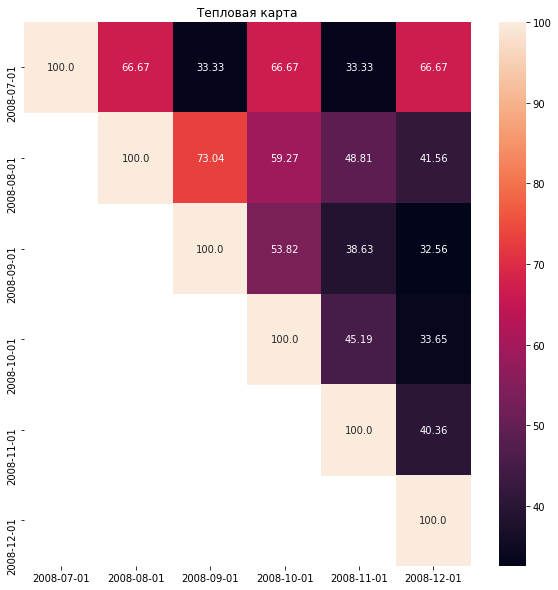

In [ ]:
# постройте тепловую карту Retention Rate
retention = tmp.pivot('cohort_dt', 'session_date', 'retention_rate')
retention.index = [str(x)[0:10] for x in retention.index]
retention.columns = [str(x)[0:10] for x in retention.columns]
plt.figure(figsize=(10, 10))
sns.heatmap(retention,
            annot=True,
            fmt='')
plt.title('Тепловая карта')
plt.show()


**Вывод:**

* Аномалии:
    * для первой когорты значения сменяют друг друга и скачут. Тогда как обычно удержание уменьшается по экспоненте либо линейно

* Причина - вероятнее всего техническая для аномалий с чехардой, а для второго это  

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [ ]:
# напишите запрос
query = '''
SELECT EXTRACT(MONTH FROM creation_date::date) as creation_month, COUNT(*),
ROUND((COUNT(*) - LAG(COUNT(*)) OVER ())::numeric / (LAG(COUNT(*)) OVER ())*100,2)
FROM stackoverflow.posts
WHERE (EXTRACT(MONTH FROM creation_date::date) BETWEEN 9 AND 12) AND (EXTRACT(YEAR FROM creation_date::date) = 2008)
GROUP BY 1
'''

# выполните запрос

In [ ]:
tmp = pd.read_sql_query(sql=query,con=engine)

In [ ]:
tmp

,creation_month,count,round
0,9.0,70371,NaN
1,10.0,63102,-10.33
2,11.0,46975,-25.56
3,12.0,44592,-5.07


Постройте круговую диаграмму с количеством постов по месяцам.

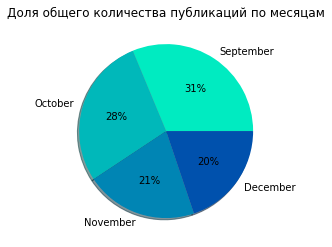

In [ ]:
# постройте круговую диаграмму с количеством постов по месяцам
plt.pie(data=tmp,x='count',labels=['September','October','November','December'],autopct='%.0f%%',shadow=True,colors= ["#00ebc1", "#00b8ba", "#0085b4", "#0051ad", "#001ea6"])
plt.title('Доля общего количества публикаций по месяцам')
plt.show()


**Вывод:**
* С сентября по декабрь 2008 года наблюдался стабильный упадок кол-ва публикаций по месяцам:
    * **Сентябрь - 70_371**
    * **Октябрь - 60_102**
    * **Ноябрь - 46_975**
    * **Декабрь - 44_592**
    

# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [ ]:
# напишите запрос
query = '''
WITH max_posts_user AS (
(SELECT users.id
FROM stackoverflow.posts JOIN
    stackoverflow.users ON posts.user_id = users.id
GROUP BY users.id
ORDER BY COUNT(*) DESC
LIMIT 1))

SELECT DISTINCT EXTRACT(WEEK FROM creation_date)::int, LAST_VALUE(creation_date) OVER (PARTITION BY EXTRACT(WEEK FROM creation_date)::int ORDER BY creation_date RANGE BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)
FROM stackoverflow.posts
WHERE EXTRACT(MONTH FROM creation_date) = 10 AND user_id IN (SELECT *
                                                             FROM max_posts_user)
GROUP BY creation_date
'''

# выполните запрос

In [ ]:
tmp = pd.read_sql_query(sql=query,con=engine)

In [ ]:
tmp

,date_part,last_value
0,40,2008-10-05 09:00:58
1,41,2008-10-12 21:22:23
2,42,2008-10-19 06:49:30
3,43,2008-10-26 21:44:36
4,44,2008-10-31 22:16:01


# Общий вывод

**Общий вывод:**


С помощью библиотеки sqlalchemy были выполнены поставленные задачи. Данны соответствующие выводы.

* **Задние 1 Анализ общего количества публикаций по месяцам**
    * Максимальное кол-во публикаций равно **452_928_568** и приходится на сентябрь 2008 года
    * Минимальное равно **669_895**, сделанные за июль 2008 года
    * Ключевые выводы:
        * 3 месяца с июль по сентябрь наблюдался резкий рост публикаций.
        * С октября по декабрь наблюдался спад.
        
        
* **Задание 2 Анализ отображающихся имен пользователей**
    * **254 пользователей с 19 неуникальными именами**
    * **57 уникальных отображающихся имен**

* **Задание 3 Количество публикаций за 2008 год по месяцам, пользователей, зарегистрированных в сентябре 2008 года.**
    * Были выявлены аномалии -   32 публикаций в августе 2008 года
* **Задание 6 Сколько в среднем на первой недели декабря 2008 года пользователи взаимодействовали с сайтом.
    * В среднем пользователи были активны **2 дня** в первой недели декабря 2008 года


* **Задание 8 Когортный анализ**
    * Аномалии: для первой когорты значения сменяют друг друга и скачут. Тогда как обычно удержание уменьшается по экспоненте либо линейно

* **Задание 9 На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года**
    * С сентября по декабрь 2008 года наблюдался стабильный упадок кол-ва публикаций по месяцам:
        * **Сентябрь - 70_371**
        * **Октябрь - 60_102**
        * **Ноябрь - 46_975**
        * **Декабрь - 44_592**
    